## Analise exploratoria de dados histophatologic cancer detect dataset

In [2]:
# load extensions
%load_ext rich
%load_ext ensurewd

In [3]:
# load libs and utils

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich import print

from utils.config import get_conf
from utils.data_sanity import check_imgs, get_path_list
from utils.plots import plot_images_on_grid


In [4]:
# defining paths and load settings of dataset

TRAIN_PATH = Path('../data/raw/histopathologic-cancer-detection/train/')
TEST_PATH = Path('../data/raw/histopathologic-cancer-detection/test/')
TRAIN_LABELS_PATH = Path(
    '../data/raw/histopathologic-cancer-detection/train_labels.csv'
)
CONF_PATH = Path('../data/conf.toml')

dataset_conf = get_conf(conf_path=CONF_PATH)

histopathologic_cancer_conf = dataset_conf['histopatological_cancer_detection']
histopathologic_cancer_conf

{'message': 'this a message'}

### Tamanho do dataset e distribuição de classes

- Conjunto de treino e conjunto de test

In [5]:
train_images_path_list = get_path_list(TRAIN_PATH)
test_images_path_list = get_path_list(TEST_PATH)

In [6]:
print(f'Train samples: {len(train_images_path_list)}')
print(f'Test samples: {len(test_images_path_list)}')

Train samples: 220025

Test samples: 57458

- Labels do dataset

In [40]:
labels_images_csv = pd.read_csv(TRAIN_LABELS_PATH)

In [41]:
# quick look on labels
labels_images_csv.tail(n=10)

,id,label
220015,9c0ad1bf43e2fa5e25fac5c8af616c5ae194c187,0
220016,4236e88fb08d16316395f0e71a0a44c4a6fdf794,0
220017,025427fc9743354111cbbc60cab9be094465602b,0
220018,cdf7171a796090072ce521012497c78c9a56cad3,0
220019,1fdacc29221a64e39d5d294d114c9e29da8705ae,0
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0
220024,a81f84895ddcd522302ddf34be02eb1b3e5af1cb,1


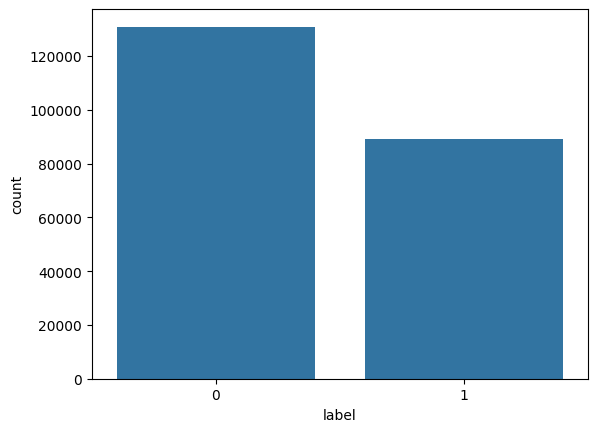

In [43]:
_ = sns.countplot(data=labels_images_csv, x='label')
plt.show()

In [46]:
labels_images_csv.value_counts(['label'], normalize=True)


label
0        0.594969
1        0.405031
Name: proportion, dtype: float64

### Verificando sanidade dos dados

-

In [49]:
# check train path
train_images_data_sanity = check_imgs(train_images_path_list)

In [69]:
err = len(train_images_data_sanity['img_error'])
fmt = set(train_images_data_sanity['img_format'])
mode = set(train_images_data_sanity['img_modes'])
hg = set(train_images_data_sanity['img_height'])
wd = set(train_images_data_sanity['img_width'])

print(f'Errors: {err}, Dim: {wd} {hg}, Modes: {mode}, formats:{fmt}')

Errors: 0, Dim: {96} {96}, Modes: {'RGB'}, formats:{'TIFF'}

In [71]:
# check test path

test_images_data_sanity = check_imgs(test_images_path_list)

In [72]:
err = len(test_images_data_sanity['img_error'])
fmt = set(test_images_data_sanity['img_format'])
mode = set(test_images_data_sanity['img_modes'])
hg = set(test_images_data_sanity['img_height'])
wd = set(test_images_data_sanity['img_width'])

print(f'Errors: {err}, Dim: {wd} {hg}, Modes: {mode}, formats:{fmt}')

Errors: 0, Dim: {96} {96}, Modes: {'RGB'}, formats:{'TIFF'}

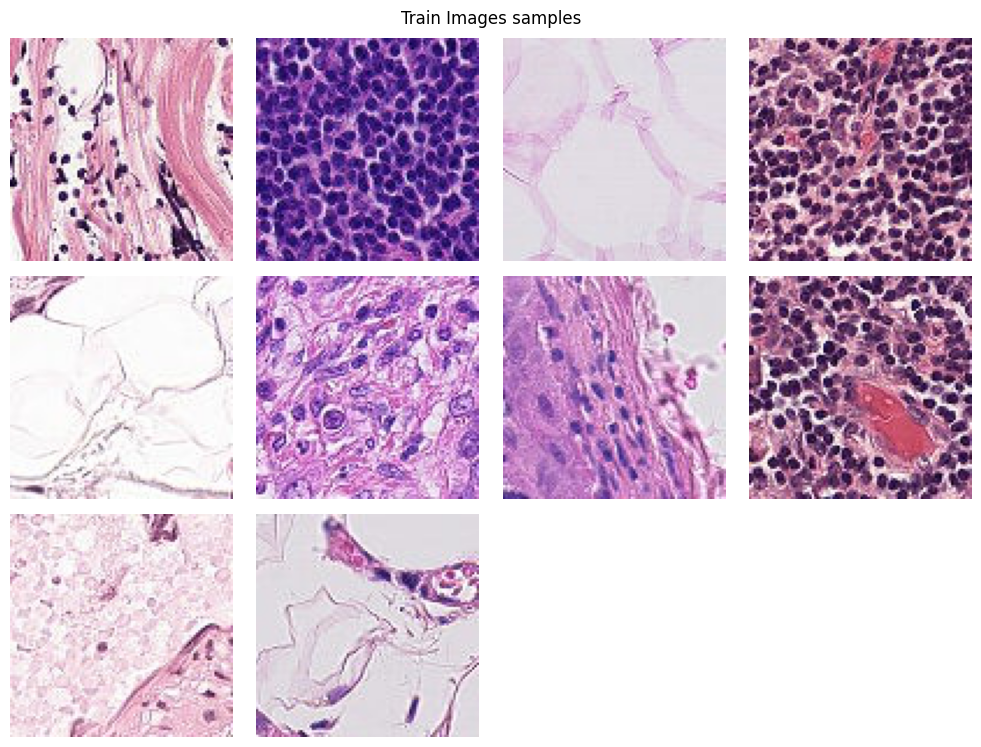

In [7]:
# plotting samples of dataset
plot_images_on_grid(train_images_path_list, 10, 'Train Images samples')

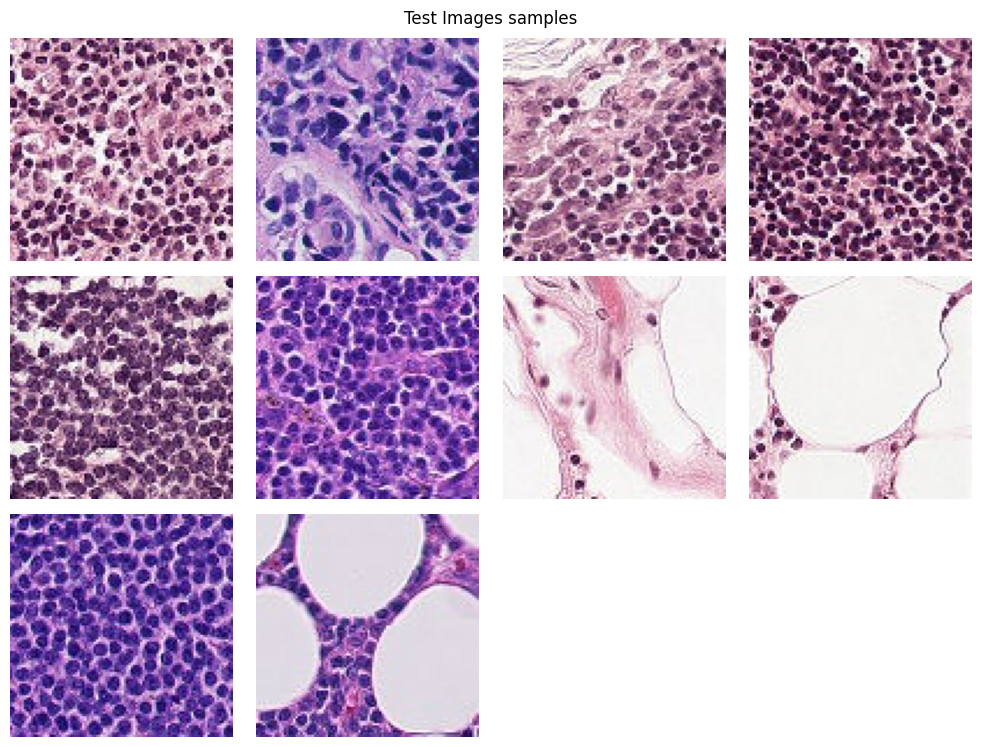

In [12]:
plot_images_on_grid(test_images_path_list, 10, 'Test Images samples')

### Verificando distribuição de pixels no dataset
-